#### **Enhancing Customer Experience and Boosting Sales in E-commerce**

Summary:
 - An e-commerce company sells products through its website and mobile app.
 - To make a purchase, a customer registers on the portal (using the website or app). 
 - Each time the customer logs in, the system records the time spent logged in, either on the app or on the website.
 - For each customer, the company keeps a record of sales with the total amount spent per month. 
 - The company would like to increase sales, but the budget allows investment only in the website or app at the moment.
 - The goal is to improve the customer experience during navigation in the system, increasing the time logged in, increasing engagement, and consequently increasing sales.

Note: In linear regression, we want the predictor variables to have a high correlation with the target variable. 
At the same time, we do not want a high correlation among the predictor variables between themselves

Variables:
 - `customer_registration_time`: float64 | Time since the customer created an account in years.
 - `average_clicks_per_session`: float64 | Average of clicks (or screen touches) in a session.
 - `total_time_logged_on_app`: float64 | Time logged in shown in minutes.
 - `total_time_logged_on_website`: float64 | Time logged in shown in minutes.
 - `total_amount_spent`: float64 | Total spent by the customer in a month (USD).

In [7]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn                                           # Used to build ML models
from sklearn.model_selection import train_test_split     # Divide data in test and train subsets
from sklearn.preprocessing import StandardScaler         # Allows data standardization
from sklearn.linear_model import LinearRegression        # Our three algos: LN, Ridge and Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score    # Calculam métricas do modelo
sns.set_style('whitegrid')                               # The graphic style on SNS
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [60]:
# Loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/andrecsta/ml-projects/main/Increasing%20Sales%20with%20Machine%20Learning/Assets/dataset.csv')

In [9]:
# eUnderstanding the dataset
print(data.shape[0],' rows')
print(data.shape[1],' columns')
print(50*'-')
data.describe()

500  rows
5  columns
--------------------------------------------------


,customer_registration_time,average_clicks_per_session,total_time_logged_on_app,total_time_logged_on_website,total_amount_spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.533462,33.053194,12.052488,37.060445,499.314038
std,0.999278,0.992563,0.994216,1.010489,79.314782
min,0.269901,29.532429,8.508152,33.913847,256.670582
25%,2.930450,32.341822,11.388153,36.349257,445.038277
50%,3.533975,33.082008,11.983231,37.069367,498.887875
75%,4.126502,33.711985,12.753850,37.716432,549.313828
max,6.922689,36.139662,15.126994,40.005182,765.518462


In [10]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_registration_time    500 non-null    float64
 1   average_clicks_per_session    500 non-null    float64
 2   total_time_logged_on_app      500 non-null    float64
 3   total_time_logged_on_website  500 non-null    float64
 4   total_amount_spent            500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [11]:
data.sample(5)

,customer_registration_time,average_clicks_per_session,total_time_logged_on_app,total_time_logged_on_website,total_amount_spent
222,4.724027,32.230149,11.084361,37.959684,517.165136
103,5.081210,33.076536,9.607315,36.493993,507.212569
284,2.436959,34.050947,11.388645,39.081565,451.628610
281,5.023934,31.720770,11.752343,38.573605,538.774933
62,4.124585,32.820310,11.634893,35.368626,507.441832


In [12]:
# Correlation between the variables
data.corr()

,customer_registration_time,average_clicks_per_session,total_time_logged_on_app,total_time_logged_on_website,total_amount_spent
customer_registration_time,1.000000,0.060247,0.029143,-0.047582,0.809084
average_clicks_per_session,0.060247,1.000000,-0.027826,-0.034987,0.355088
total_time_logged_on_app,0.029143,-0.027826,1.000000,0.082388,0.499328
total_time_logged_on_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
total_amount_spent,0.809084,0.355088,0.499328,-0.002641,1.000000


<AxesSubplot: >

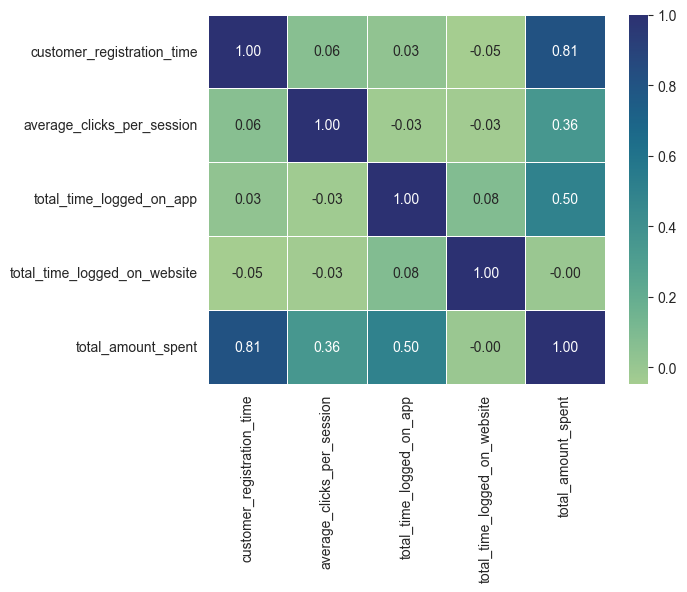

In [13]:
# Correlation between the variables, in a visual matrix
corr_df = data.corr()
sns.heatmap(corr_df, annot = True, cmap = 'crest', fmt = '.2f', linewidth=.5)

**Exploratory Analysis 1 - Relation between time logged in and value spent**

First, let's start by checking the time logged into the website.

<Figure size 1800x1200 with 0 Axes>

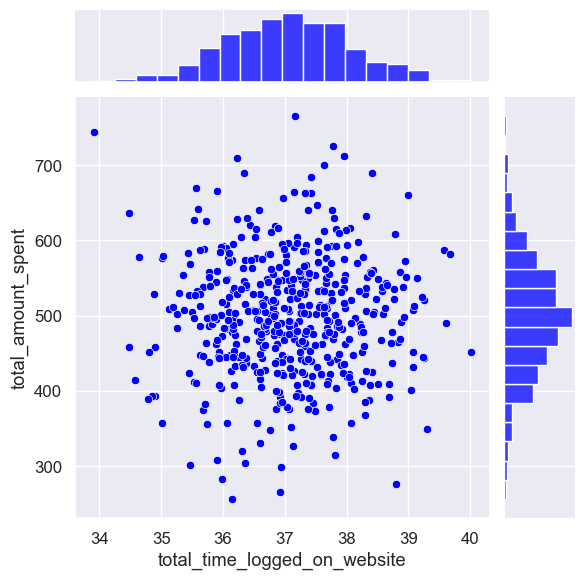

In [14]:
# Plot, using both a histogram and a scatterplot through a jointplot
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = data,                            
              x = 'total_time_logged_on_website',
              y = 'total_amount_spent',
              color = 'blue')

There seems to be no direct relationship between these two variables. If the customer spends more time on the website, he doesn't seem to spend more.

We can be sure about that looking at the correlation:

In [15]:
# Correlation
data[['total_time_logged_on_website', 'total_amount_spent']].corr()

,total_time_logged_on_website,total_amount_spent
total_time_logged_on_website,1.000000,-0.002641
total_amount_spent,-0.002641,1.000000


In fact, correlation is very close to 0, which indicates no correlation. 

Maybe the time logged into the app has a higher correlation? Let's see.

<Figure size 1800x1200 with 0 Axes>

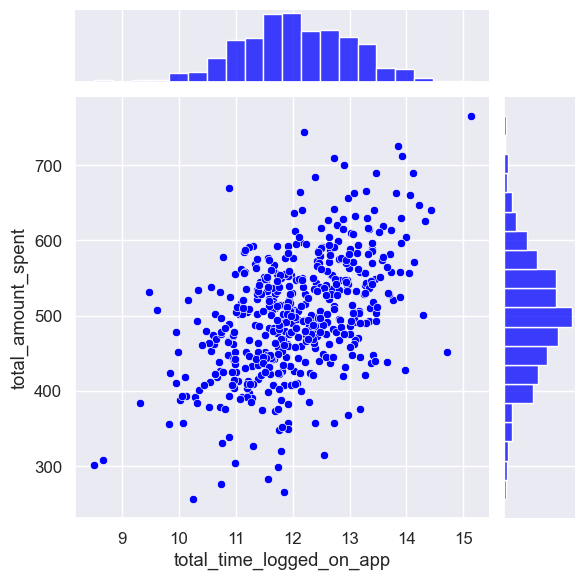

In [16]:
# Plot, using both a histogram and a scatterplot through a jointplot
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = data,                            
              x = 'total_time_logged_on_app',
              y = 'total_amount_spent',
              color = 'blue')

Here we see a positive correlation.

In [17]:
# Correlation between them
data[['total_time_logged_on_app', 'total_amount_spent']].corr()

,total_time_logged_on_app,total_amount_spent
total_time_logged_on_app,1.000000,0.499328
total_amount_spent,0.499328,1.000000


Correlation of 0.5, moderately positive, which is an indication that there is a relationship between more time logged into the app and more spending.

**Exploratory analysis 2 - Relationship between registration time and time logged in**

<Figure size 1800x1200 with 0 Axes>

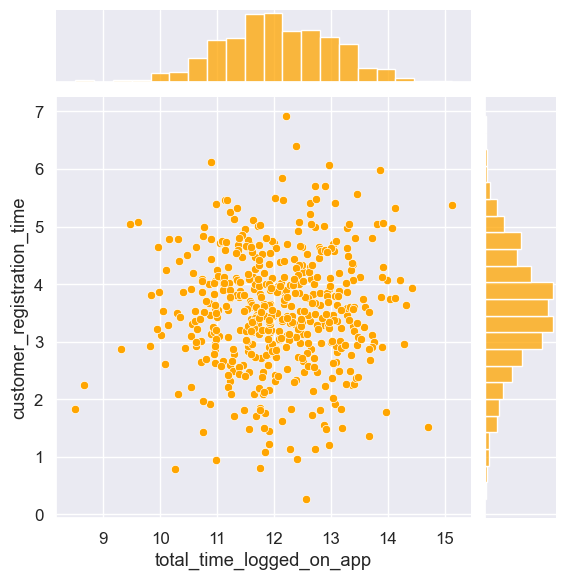

In [18]:
# Joint plot
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = data,                           
              x = 'total_time_logged_on_app',
              y = 'customer_registration_time',
              color = 'orange')

There doesn't seem to be any correlation. But you can see that customers who have been registered for 3-4 years spend about ~12 minutes logged into the app.

In [19]:
# Correlation between them
data[['total_time_logged_on_app', 'customer_registration_time']].corr()

,total_time_logged_on_app,customer_registration_time
total_time_logged_on_app,1.000000,0.029143
customer_registration_time,0.029143,1.000000


**Exploratory Analysis 3 - Relationship between registration time and amount spent**

The *sns.lmplot* function gives an idea of how our model will perform.

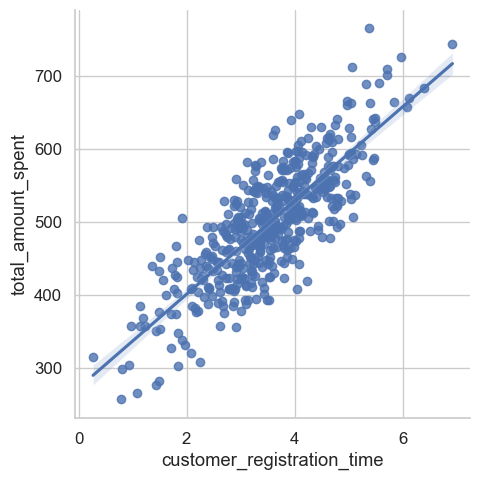

In [20]:
# Joint Plot
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(data, x = 'customer_registration_time', y = 'total_amount_spent')

Here we see a very positive correlation. Longer registration time = more expenses.

The shaded area around the line is the margin of error, which is quite low

In [21]:
# Correlation between them
data[['total_amount_spent', 'customer_registration_time']].corr()

,total_amount_spent,customer_registration_time
total_amount_spent,1.000000,0.809084
customer_registration_time,0.809084,1.000000


Very high correlation. Perhaps the smart thing to do would be to retain customers, and not worry about website or app specifically.

**Exploratory Analysis 4 - Relationship between time logged in on the app vs on the website**.

<Figure size 1800x1200 with 0 Axes>

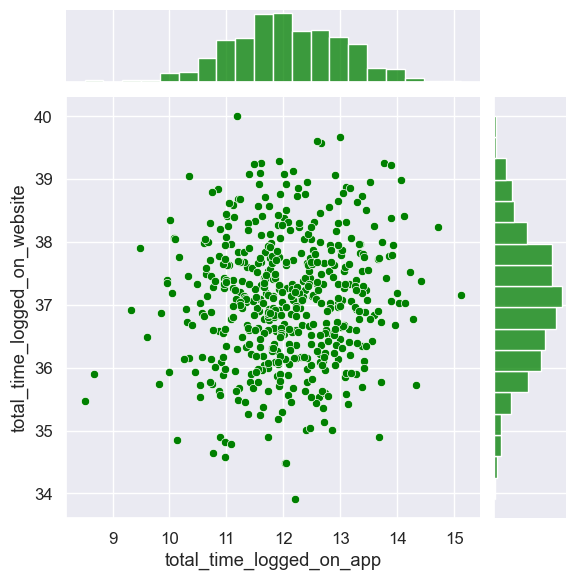

In [22]:
# Joint Plot
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = data,                            
              x = 'total_time_logged_on_app',
              y = 'total_time_logged_on_website',
              color = 'green')

There seems to be any correlation.

In [23]:
# Correlation between them
data[['total_time_logged_on_app', 'total_time_logged_on_website']].corr()

,total_time_logged_on_app,total_time_logged_on_website
total_time_logged_on_app,1.000000,0.082388
total_time_logged_on_website,0.082388,1.000000


Yes, a value close to 0 confirms that.

**Preprocessing the data to build ML models**

Next, we will divide the data into test and training groups.

Our target variable will be `total_amount_spent`

In [24]:
data.columns

Index(['customer_registration_time', 'average_clicks_per_session',
       'total_time_logged_on_app', 'total_time_logged_on_website',
       'total_amount_spent'],
      dtype='object')

We are storing our predictor variables in the `x` object, and the target variable in the `y` object.

In [25]:
# Variable division
y = data['total_amount_spent']

x = data[['customer_registration_time', 
            'average_clicks_per_session',
            'total_time_logged_on_app',
            'total_time_logged_on_website']]

In [26]:
# Dividing the data into train and test groups.
# We chose to use 70% of the data to the training group and 30% to the test group.

# The function `train_test_split` returns four results.
# We need to store each of them, they are related to the preditor and target variables.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

**Data Standardization**

The data are pretty much on the same scale, but it is important to standardize.

The StandardScaler package is a python class, stored in an object. I apply the training date to this object and then use it to change the training and test data.

In [27]:
# Creating the scaler
scaler = StandardScaler()

In [28]:
# Training the scaler
scaler.fit(x_train)

StandardScaler()

In [29]:
# Applying the scaler in the data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
x_train[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

#### **Linear Regression: A Brief Explanation**

Linear regression is used to predict data. The model finds the relationship between the data and outputs a prediction.

![LR_Expl1](\Assets\Img_LR_Expl1.PNG)

Use the image above as a reference.

Linear regression has a formula, which is made up of different *coefficients*.
- (a) intercept: just look at the point y that the line passes through when x is 0. in this case, it is (0, 40), so the intercept is 40.

- (b) angular coefficient: if the line goes through (0,40) and (10,35), then the angular coefficient is the subtraction of x with x and y with y

    35-40 / 10 - 0 = -0.5

to build the model formula, just use 
    **y = a + bx** 

which translates to
    **y = 40 + (-0.5)x**

In multiple linear regression, we have several variables. In simple regression, only one.

For a multiple linear regression, we have:

**y = a + b1x1 + b2x2 .... + e**

Where: 

- (a) intercept: just look at the point y that the line passes through when x is 0. in this case, it is (0, 40), so the intercept is 40.

- (b) angular coefficient: if the line goes through (0,40) and (10,35), then the angular coefficient is the subtraction of x with x and y with y

- (x) constant of the variable, to be replaced by a value at each point

- (e) standard error

**Creating the model**

The object `model_v1' is an instance of the class LinearRegression(). That's our first model.

Now, we are going to train it.

In [31]:
# Creating the model
model_v1 = LinearRegression()

In [32]:
# Training the model
model_v1.fit(x_train, y_train)

LinearRegression()

In [33]:
# Let's find the coefficients:
# Here, the intercept is not shown.
print('The coefficients are: \n',
    '\n b1 ',model_v1.coef_[0],
    '\n b2 ',model_v1.coef_[1],
    '\n b3 ',model_v1.coef_[2],
    '\n b4 ',model_v1.coef_[3])

The coefficients are: 
 
 b1  63.74220715689191 
 b2  26.23901605523608 
 b3  38.57185550589678 
 b4  0.6847366049059538


In [34]:
# Our coefficients are in fact our variables. 
# Let's see how that translates into them.
df_coef = pd.DataFrame(model_v1.coef_, x.columns, columns = [['coefficients']])
df_coef

,coefficients
customer_registration_time,63.742207
average_clicks_per_session,26.239016
total_time_logged_on_app,38.571856
total_time_logged_on_website,0.684737


In [35]:
# Model predictions
pred_v1 = model_v1.predict(x_test)
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

Text(0, 0.5, 'Predicted value of y')

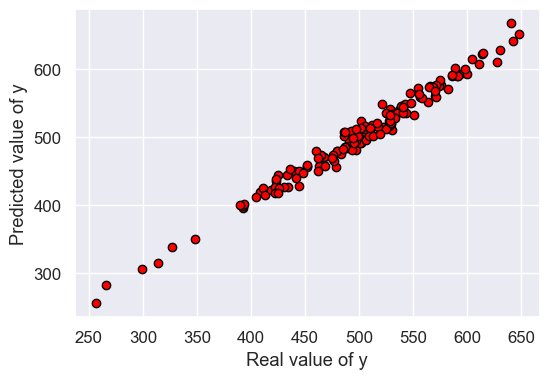

In [36]:
# Let's plot a graph to see how close the model is to the actual data of y
plt.figure(figsize=(6,4))
plt.scatter(x = y_test, y = pred_v1, c = 'red', edgecolors='black')
plt.xlabel('Actual value of y')
plt.ylabel('Predicted value of y')

This view indicates that the model looks very good and has a good success rate.

Let's calculate some metrics that show this performance.

##### **Model metrics**

These are the metrics that will be the basis for our analysis. 

We'll use them to evaluate our model and compare it to the others we are going to build.

**MAE (Mean Absolute Error)**

The mean absolute error (MAE) predicts that, on average, our model's predictions (of `total_amount_spent`) are wrong by approximately 7.76 USD, which is a small value compared to the average amount spent per customer.

This 7.76 is the e (error) from the multiple lin. reg. formula.

In [72]:
# MAE
mean_absolute_error(y_test,pred_v1)

# Avg: 499.31
data.describe()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.533462,33.053194,12.052488,37.060445,499.314038
std,0.999278,0.992563,0.994216,1.010489,79.314782
min,0.269901,29.532429,8.508152,33.913847,256.670582
25%,2.930450,32.341822,11.388153,36.349257,445.038277
50%,3.533975,33.082008,11.983231,37.069367,498.887875
75%,4.126502,33.711985,12.753850,37.716432,549.313828
max,6.922689,36.139662,15.126994,40.005182,765.518462


**MSE (Mean Squared Error)**

In [38]:
# MSE
mean_squared_error(y_test,pred_v1)

94.95654308438668

**RMSE (Root Mean Squared Error)**

The RMSE predicts that, on average, our model's predictions (of `total_amount_spent`) are wrong by approximately 9.74 USD, which is a small value compared to the amount spent per customer.

In [39]:
#RMSE
np.sqrt(mean_squared_error(y_test,pred_v1))

9.74456479707466

**R2 Coefficient**

Numerical value that goes from 0 to 1. The higher the better. 

It answers whether the model fits the data well. In ours we got 0.98, almost perfect.

In [40]:
# R2
r2_score(y_test, pred_v1)

0.9813622791776302

**Variance**

The measure that calculates the distance of the actual data points from the regression line is the variance. 

It is one of the measures of dispersion, showing the behavior of a sample's data relative to a central measure (in this case, our model's predictions)

The higher the variance, the more the model is able to detect the pattern of the data. Our model got 0.98, which is great too.

In [41]:
explained_variance_score(y_test, pred_v1)

0.9817449183428639

##### **The importance of residuals**

The residual represents the amount of variability that y that the fitted model cannot explain. It is that difference between the prediction of y and its actual value.

In the case of our dataset, this is very close to a normal distribution.

<Figure size 800x600 with 0 Axes>

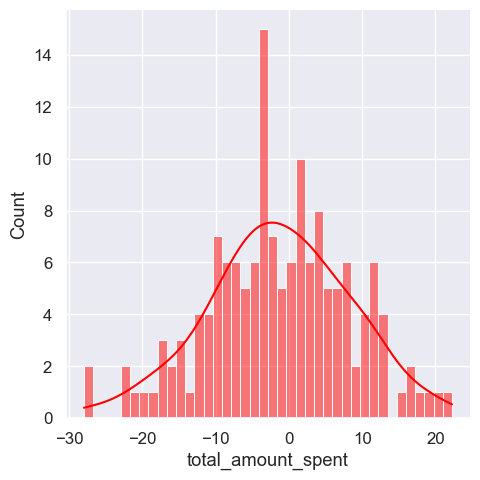

In [42]:
# Plot
plt.figure(figsize=(8,6))
ax = sns.displot((y_test - pred_v1),
                bins = 40,
                color = 'red',
                kde = True)

### **ML model using Regression Ridge**

When building an ML model, it is important to compare it to others built before. So let's build a new one using Ridge Regression, which uses an regularization, useful when we want to reduce **overfitting**. 

We add a mathematical element for this, an alpha.

In [43]:
# Creating the model
modelo_v2 = Ridge(alpha=1.0)

In [44]:
# Training the model
modelo_v2.fit(x_train, y_train)

Ridge()

In [45]:
# Extract the predictions
pred_v2 = modelo_v2.predict(x_test)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

The values of the coefficients are very close to the values of the model_v1.

In [46]:
# Showing the coefficients
df_coef = pd.DataFrame(modelo_v2.coef_, x.columns, columns = [['coefficients']])
df_coef


,coeficientes
customer_registration_time,63.572460
average_clicks_per_session,26.171981
total_time_logged_on_app,38.467582
total_time_logged_on_website,0.680135


The plot too. Very close to the real data.

Text(0, 0.5, 'Valor previsto de y')

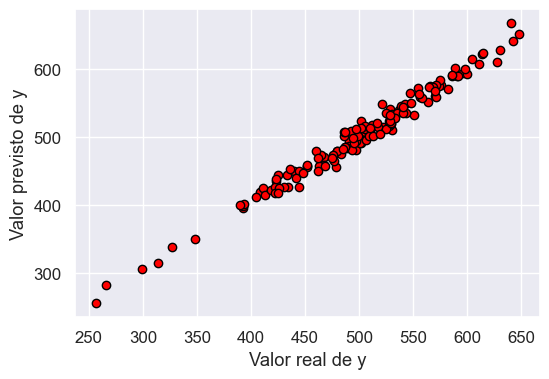

In [47]:
# Let's plot a graph to see how close the model is to the actual data of y
plt.figure(figsize=(6,4))
plt.scatter(x = y_test, y = pred_v2, c = 'red', edgecolors='black')
plt.xlabel('Actual value of y')
plt.ylabel('Predicted value of y')

In [73]:
# Now, I've created a function to quickly display the metrics
def teste_perf(yteste, ypred):
    MAE = mean_absolute_error(yteste, ypred)
    MSE = mean_squared_error(yteste, ypred)
    RMSE = np.sqrt(mean_absolute_error(yteste, ypred))
    R2_SCORE = r2_score(yteste, ypred)
    EXP_VAR = explained_variance_score(yteste, ypred)

    print('MAE: ',        MAE,
          '\n MSE:',      MSE,
          '\n RMSE: ',    RMSE,
          '\n R2_SCORE',  R2_SCORE,
          '\n EXP_VAR: ', EXP_VAR  )
    return pd.DataFrame([[MAE, MSE, RMSE, R2_SCORE, EXP_VAR]])



In [74]:
# Let's test the performance of model_v2 and join the data
results_v2 = teste_perf(y_test, pred_v2)
results_v1 = teste_perf(y_test, pred_v1)

results_v1.set_axis(["MAE", "MSE", "RMSE", "R2_SCORE", "EXP_VAR"], axis = 'columns', inplace= True)
results_v1.set_axis(["model_v1: Linear Regression"], axis = 'index', inplace= True)

results_v2.set_axis(["MAE", "MSE", "RMSE", "R2_SCORE", "EXP_VAR"], axis = 'columns', inplace= True)
results_v2.set_axis(["model_v2: Ridge Regression "], axis = 'index', inplace= True)

results = results_v1.append(results_v2)
results


MAE:  7.764151148981961 
 MSE: 94.93731602493467 
 RMSE:  2.7864226436386064 
 R2_SCORE 0.981366052994101 
 EXP_VAR:  0.9817472659016085
MAE:  7.762418645778983 
 MSE: 94.95654308438668 
 RMSE:  2.786111743232669 
 R2_SCORE 0.9813622791776302 
 EXP_VAR:  0.9817449183428639


,MAE,MSE,RMSE,R2_SCORE,EXP_VAR
model_v1: Linear Regression,7.762419,94.956543,2.786112,0.981362,0.981745
model_v2: Ridge Regression,7.764151,94.937316,2.786423,0.981366,0.981747


<Figure size 800x600 with 0 Axes>

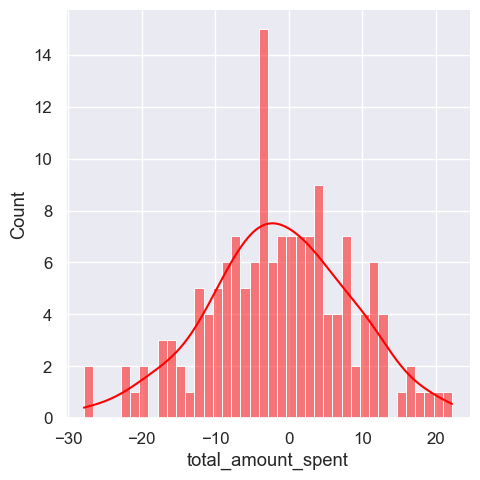

In [50]:
# Plot of the model residuals
plt.figure(figsize=(8,6))
ax = sns.displot((y_test - pred_v2),
                bins = 40,
                color = 'red',
                kde = True)

### **Lasso Regression ML Model**

At what point do we stop building models? That depends.

What might dictate this is setting a goal for a metric, such as an RMSE error rate of 6. Once we reach this goal, we can be satisfied.

Each ML algorithm has multiple parameter variations, and this can be exploited. Regression for example has Ridge and Lasso variations.

In [51]:
# Creating the model
modelo_v3 = Lasso(alpha=1.0)

In [52]:
# Training the model
modelo_v3.fit(x_train, y_train)

Lasso()

In [53]:
# Extracting Predictions
pred_v3 = modelo_v3.predict(x_test)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

In [54]:
# Coefficients
df_coef = pd.DataFrame(modelo_v3.coef_, x.columns, columns=['Coefficient'])
df_coef

,Coeficiente
customer_registration_time,62.863441
average_clicks_per_session,25.187472
total_time_logged_on_app,37.621492
total_time_logged_on_website,0.000000


Text(0, 0.5, 'Valor previsto de y')

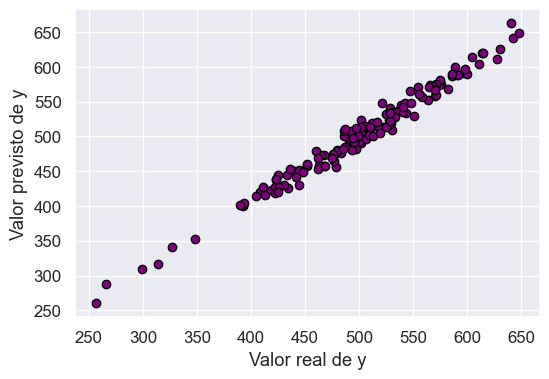

In [55]:
# Let's plot a graph to see how close the model is to the actual data of y
plt.figure(figsize=(6,4))
plt.scatter(x = y_test, y = pred_v3, c = 'purple', edgecolors='black')
plt.xlabel('Actual value of y')
plt.ylabel('Predicted value of y')

In [75]:
# Showing the results
results_v3 = teste_perf(y_test, pred_v3)

results_v3.set_axis(["MAE", "MSE", "RMSE", "R2_SCORE", "EXP_VAR"], axis = 'columns', inplace= True)
results_v3.set_axis(["model_v3: Lasso Regression"], axis = 'index', inplace= True)

MAE:  7.7885046969510645 
 MSE: 96.05606348970672 
 RMSE:  2.790789260576847 
 R2_SCORE 0.981146469358873 
 EXP_VAR:  0.9815600649101045


In [76]:
results = results.append(results_v3)
results

,MAE,MSE,RMSE,R2_SCORE,EXP_VAR
model_v1: Linear Regression,7.762419,94.956543,2.786112,0.981362,0.981745
model_v2: Ridge Regression,7.764151,94.937316,2.786423,0.981366,0.981747
model_v3: Lasso Regression,7.788505,96.056063,2.790789,0.981146,0.981560


<Figure size 800x600 with 0 Axes>

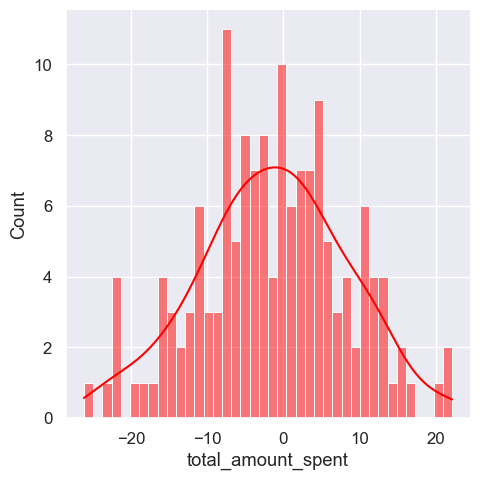

In [58]:
# Plot of the model residuals
plt.figure(figsize=(8,6))
ax = sns.displot((y_test - pred_v3),
                bins = 40,
                color = 'red',
                kde = True)

#### **Selecting the model and completing the project**

Model 3 had a slightly higher RMSE and should be discarded. Models 1 and 2 were close, in which case we should choose the simpler model, which in our example is model 1.

It is always easier to explain the results of a simpler model.

In our model, the pattern found is in the coefficients. And this is easy to find in Regression models.

In [77]:
# Coefficients
df_coef = pd.DataFrame(model_v1.coef_, x.columns, columns=['Coefficient'])
df_coef

,Coefficient
customer_registration_time,63.742207
average_clicks_per_session,26.239016
total_time_logged_on_app,38.571856
total_time_logged_on_website,0.684737


- A 1 unit increase in `customer_registration_time` is associated with an increase of USD 63.74 in the client's `total_amount_spent` per month.

- A 1 unit increase in `average_clicks_per_session` is associated with an increase of USD 26.23 in the client's `total_amount_spent` per month.

- A 1 unit increase in `total_time_logged_on_app` is associated with an increase of USD 38.57 in the client's `total_amount_spent` per month.

- A 1 unit increase in `total_time_logged_on_website` is associated with an increase of USD 0.68 in the client's `total_amount_spent` per month.

Is it worth investing in the Website? No, the gain is minimal.

**Is it worth investing in the app? Yes, for each 1 unit increase in `total_time_logged_on_app`, there can be an increase of USD 38.57 in the client's `total_amount_spent` per month. Much higher than the increase of 1 unit in the `total_time_logged_on_website`, which would add only USD 0.68 to the `total_amount_spent`.**